# Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#if instructions are not given, make any assumption you like

#import csv file resources/company_sales_data.csv
#use style seaborn-pastel
#use subplots  (with any layout you like)

#subplot 1
#plot with x as month number, and y as total profit with style circle markers and colored red
#title = Company profit per month
#put at least one ax/plt.text
#x label = month
#y label = total profit
##set the ylimit to 100000 to 450000
#add guassian fitted line (does not require fill between)

#subplot2
#read each product sales and show it using a multiline plot
#x label = month
#y label = sales units in number
#legend on upper center, with columns of 3, set fontsize to 9 using prop params
#circle marker; linewidth=3
#title = sales data
#add one blue dotted line showing the average of all products, with text annotating "average"

#subplot3
#plot toothpaste sales data of each using scatter plot
#use plt.grid(True, linestyle="--") to show some gridlines  (I did not teach but its not difficult)
#x label = month
#y label = number of units sold
#title = tooth paste sales data
#legend = best position

#subplot4
#plot bar chart comparing facecream and facewash product sales data
#time to check out the documentation :)
#since x is comparing two bars, you have to adjust the x slightly for both bars
#x label = month
#y label = number of units sold
#title = facewash and facecream
#legend = upper center, column of 2
#put some gridlines for easy comparison
#to add some flavor, overlay the average of all products on this plot, so we know facecream and facewash is not doing very well!

In [3]:
#Continue above
#Create a separate histogram plot showing distribution of profit range
#with this range profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]

In [4]:
#let's try to perform a linear regression on the profit, with x = month and y = total profit
#plot the actual values using scatter
#plot the fitted line, along with error bar where yerr = yactual - ypred
#instead of using gp, use sckitlearn.LinearRegression
#last, print the R^2 with 3 significant digits (e.g., 0.502)and write it on any place on the graph

# Solution

Text(4, 4000, 'Average of all prods.')

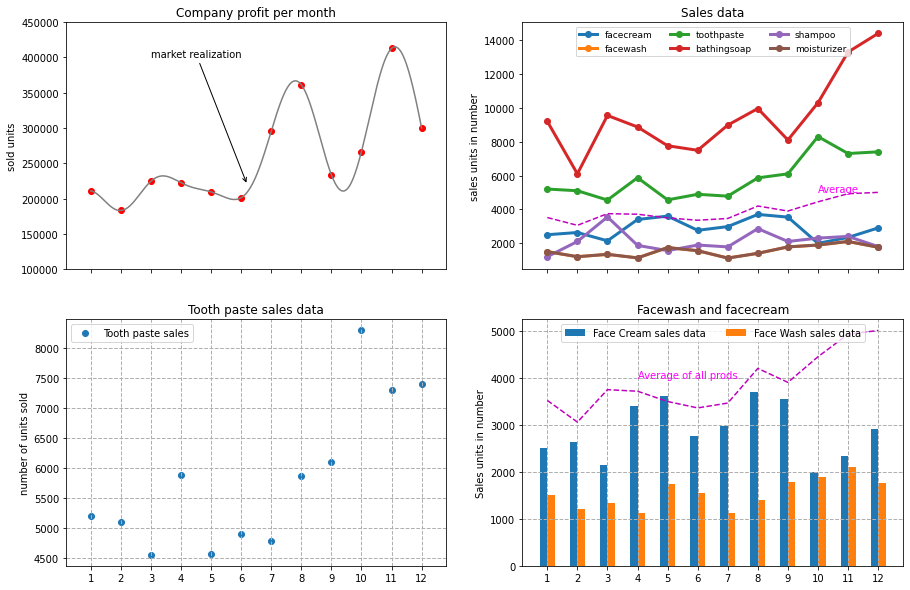

In [5]:
#1
#import csv file resources/company_sales_data.csv
#use style seaborn-pastel
#use subplots  (with any layout you like)
##set the ylimit to 100000 to 450000

df = pd.read_csv("resources/company_sales_data.csv")

#optional - for convenience
total_profit = df['total_profit']
month = df['month_number']
total_units = df['total_units']

f, ax = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

#subplot 1
ax1 = ax[0, 0]
ax1.plot(month, total_profit, 'or')

from sklearn.gaussian_process import GaussianProcessRegressor as GP
gp = GP().fit(month[:, np.newaxis], total_profit)

xfit = np.linspace(1, 12, 1000)
yfit = gp.predict(xfit[:, np.newaxis])

# Visualize the result
ax1.plot(xfit, yfit, '-', color='gray')   #fitted by guassian

ax1.title.set_text("Company profit per month")
ax1.set_ylabel("sold units")
ax1.set_ylim(100000, 450000)
ax1.set_xticks(month)  #set one time will influence others since sharex=True

ax1.annotate('market realization', xy=(6.2, 220000), xytext=(3, 400000),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

#subplot2
ax2 = ax[0, 1]
ax2.set_ylabel("sales units in number")
ax2.title.set_text("Sales data")
for col in df.columns[1:-2]:
    ax2.plot(month, df[col], marker='o', linewidth=3, label=col)
ax2.legend(loc='upper center', ncol=3, prop={'size': 9})

average = df[df.columns[1:-2]].mean(axis=1)
ax2.plot(month, average, 'm--')
ax2.text(10, 5000, "Average", color="magenta")

#subplot3
ax3 = ax[1, 0]
ax3.scatter(month, df['toothpaste'], label="Tooth paste sales")
ax3.grid(True, linewidth= 1, linestyle="--")
ax3.set_ylabel("number of units sold")
ax3.title.set_text("Tooth paste sales data")
ax3.legend(loc='best')

#subplot4
ax4 = ax[1, 1]
ax4.bar([a - 0.25 for a in month], df['facecream'], width= 0.25, label = 'Face Cream sales data', align='edge')
ax4.bar([a for a in month], df['facewash'], width= 0.25, label = 'Face Wash sales data', align='edge')
ax4.set_ylabel('Sales units in number')
ax4.legend(loc='upper center', ncol=2)
ax4.title.set_text('Facewash and facecream')
ax4.grid(True, linewidth= 1, linestyle="--")
ax4.plot(month, average, 'm--')
ax4.text(4, 4000, "Average of all prods.", color="magenta")



Text(0.5, 1.0, 'Profit data')

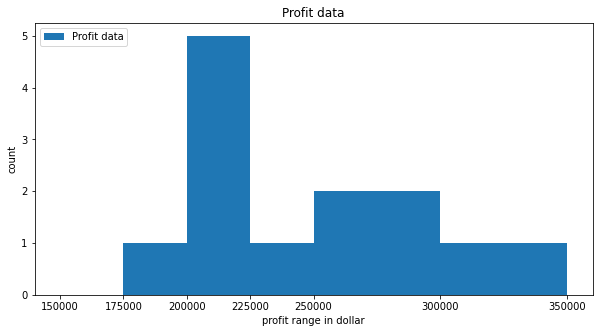

In [6]:
plt.figure(figsize = (10, 5))
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
plt.hist(df['total_profit'], profit_range, label = 'Profit data')
plt.xlabel('profit range in dollar')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xticks(profit_range)
plt.title('Profit data')

<ErrorbarContainer object of 3 artists>

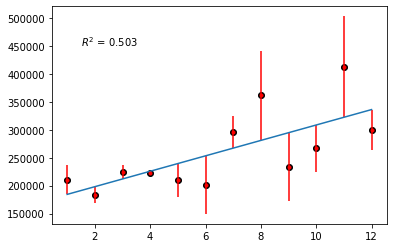

In [7]:
#let's try to perform a linear regression on the profit, with x = month and y = total profit
#plot the fitted line, along with error line from actual y to the predicted line
#instead of using gp, use sckitlearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

y = df['total_profit']
X = df['month_number'].values.reshape((len(df), 1)) #.values access the underlying numpy to allow for reshaping to (samples, features) shape

reg = LR().fit(X, total_profit)
y_preds = reg.predict(X)

plt.text(1.5, 450000, f"$R^2$ = {r2_score(y, y_preds):.3f}")

plt.scatter(X, y, color='black')
plt.plot(X, y_preds)
plt.errorbar(X, y, yerr=y-y_preds, fmt='.r')